In [77]:
from serial import Serial
from time import sleep
import numpy as np
import matplotlib.pyplot as plt

dev = Serial(port='/dev/ttyUSB2', baudrate=115200, timeout=1)
dev.reset_input_buffer()
dev.reset_output_buffer()


def _def_axis(ax):

        ax.clear()
        ax.grid(True, 'both', 'both')



In [21]:
dev.reset_input_buffer()
dev.reset_output_buffer()
# read all samples

#dev.write(b'\x23'); sleep(0.1); dev.write(b'\23') # clear memmory

dev.write(b'\x21')  # select sampler

#sleep(5)

dev.write(b'\x22')  # start sample-reader
buf = b''

while True:
    print(len(buf))
    b = dev.read(65535)
    if not len(b):
        break
    buf += b
    
samples = [int(x) for x in buf]
print('num of samples =', len(samples))
print(samples[:20])

dev.write(b'\x24')
offset = dev.read(4)
print('offset = ', offset)

offset = offset[0] << 24 + offset[1]<< 16 + offset[2] << 8 + offset[3]

offset += 255
post = (samples + samples + samples)[offset-127:offset+127]

a = np.array(post)
plt.plot(a, '.-')

0
num of samples = 0
[]
offset =  b''


IndexError: index out of range

not yet b'U'
sample count =  255
offset =  0 0 0 47
offset =  47


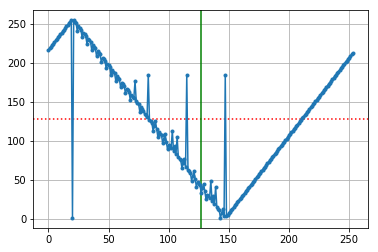

In [79]:
dev.reset_input_buffer()
dev.write(b'\x31')  # select trigger config
dev.write(b'\x04')  # select edge
dev.write(b'\x80')  # upper bound is 128
dev.write(b'\x80')  # lower bound is 128

dev.write(b'\x32')  # select sample speed config
dev.write(b'\x00')  # MSB
dev.write(b'\xff')  # LSB

dev.write(b'\x23\x00') # clear memmory

dev.write(b'\x25')  # choose adc selector
dev.write(b'\x01')  # select first ADC

if True:
    dev.write(b'\x21')  # select sampler
    sleep(1)
    dev.write(b'\x55')  # select sampler

    dat = None
    while True:  # wait for sampler to do it's thing
        dat = dev.read(1)
        print('not yet', dat)
        if dat == b'\x55':
            break


dev.write(b'\x22')  # start sample-reader
samples = dev.read(255)
print('sample count = ', len(samples))

dev.write(b'\x24')
offset = dev.read(4)
print('offset = ', offset[0],  offset[1],  offset[2],  offset[3])
offset = (offset[0] << 24) + (offset[1]<< 16) + (offset[2] << 8) + offset[3]
print('offset = ', offset)
offset = offset + 255


post = (samples + samples + samples)[offset-127:offset+127]


a = np.array([int(x) for x in post])

fig = plt.figure()
ax = fig.add_subplot(111)
_def_axis(ax)
ax.axhline(y=0x80, color='r', linestyle=':')
ax.axvline(x=127, color='g')
ax.plot(a, '.-')
fig.show()